In [1]:
from pathlib import Path

import numpy as np
import torch
import torch.nn as nn

from drdmannturb.enums import DataType
from drdmannturb.parameters import (
    LossParameters,
    NNParameters,
    PhysicalParameters,
    ProblemParameters,
)
from drdmannturb.spectra_fitting import CalibrationProblem, OnePointSpectraDataGenerator


In [2]:
# if torch.backends.mps.is_available():
#     device = "mps"
#     torch.set_default_device(device)
# else:
device = "cpu"

print(f"Using device: {device}")
print(f"Using float precision: {torch.get_default_dtype()}")
print(f"Using f32 matmul precision: {torch.get_float32_matmul_precision()}")

Using device: cpu
Using float precision: torch.float32
Using f32 matmul precision: highest


In [6]:
domain = torch.logspace(-1, 3, 40)

L = 70
Gamma = 3.7
sigma = 0.04
Uref = 21

# NOTE: Below is obtained from the LES data... we used the 31st of 60
#       heights that we were given, so this is height[30]
zref = 148.56202535609793

pb = CalibrationProblem(
    nn_params=NNParameters(
        nlayers=3, hidden_layer_sizes=[10, 10, 10], activations=[nn.ReLU(), nn.ReLU(), nn.ReLU()]
    ),
    prob_params=ProblemParameters(
        data_type=DataType.CUSTOM, 
        tol=1e-9,
        nepochs=5,
        learn_nu=True,
        learning_rate=0.3, # Default is 0.1
        # init_with_noise=True,
        noise_magnitude=0.1 # Default is 0.01
    ),
    loss_params=LossParameters(
        alpha_pen1=10.0,
        alpha_pen2=10.0,
        beta_reg=1e-1
    ),
    phys_params=PhysicalParameters(
        L=L,
        Gamma=Gamma,
        sigma=sigma,
        domain=domain,
        Uref=Uref,
        zref=zref,
    ),
    logging_directory="runs/custom_data",
    device=device,
)

In [4]:
# spectra_file = Path("data_cleaned/cleaned_weighted_spectra_quarter.dat")
spectra_file = Path("data_cleaned/log_downsampled_data.dat")
CustomData = torch.tensor(np.genfromtxt(spectra_file, skip_header=1, delimiter = ","))

f = CustomData[:, 0]
k1_data_pts = 2 * torch.pi * f / Uref

gen = OnePointSpectraDataGenerator(
    zref = zref,
    data_points = k1_data_pts,
    data_type = DataType.CUSTOM,
    spectra_file = spectra_file,
    k1_data_points = k1_data_pts.data.cpu().numpy(),
)

gen.Data

([(tensor(0.0010, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0015, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0020, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0025, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0030, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0035, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0040, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0045, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0050, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0055, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0060, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0065, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0070, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0075, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0080, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0085, dtype=torch.float64), 148.56202535609793),
  (tensor(0.0090, dtype=

In [5]:

optimal_parameters = pb.calibrate(data=gen.Data)

Initial loss: nan


  0%|          | 0/100 [00:54<?, ?it/s]


RuntimeError: Loss is not a finite value, check initialization and learning hyperparameters.

In [ ]:
pb.plot()

In [ ]:
# 100 epochs
# Bumped alpha_pen1 to 10.0
# Bumped alpha_pen2 to 10.0
pb.plot()

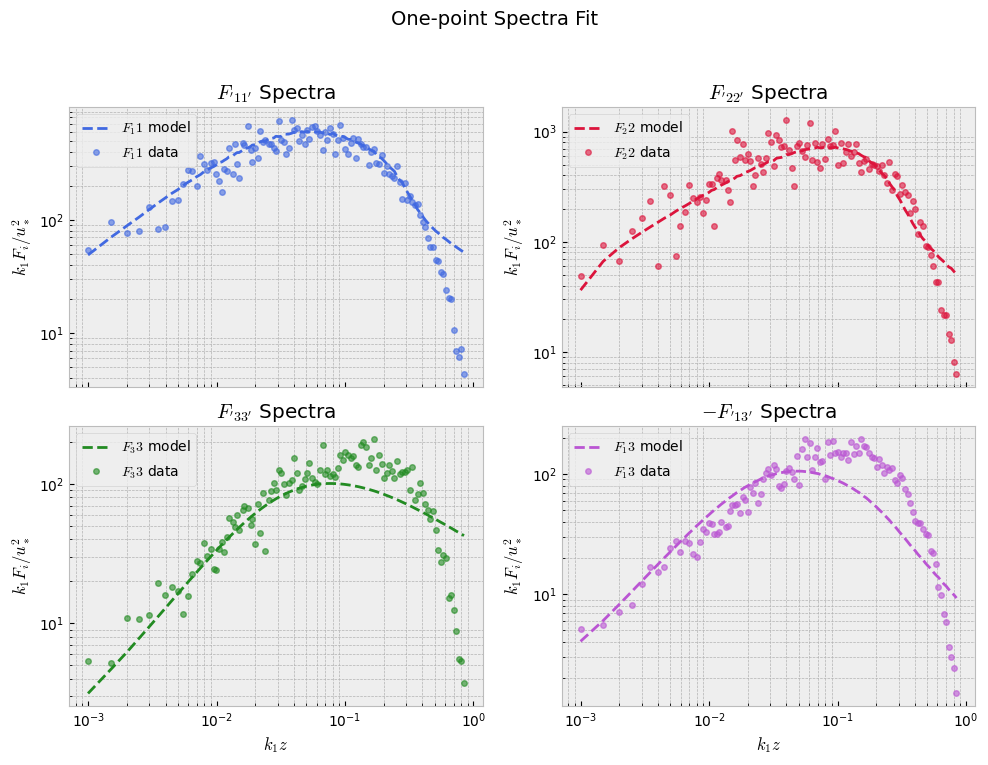

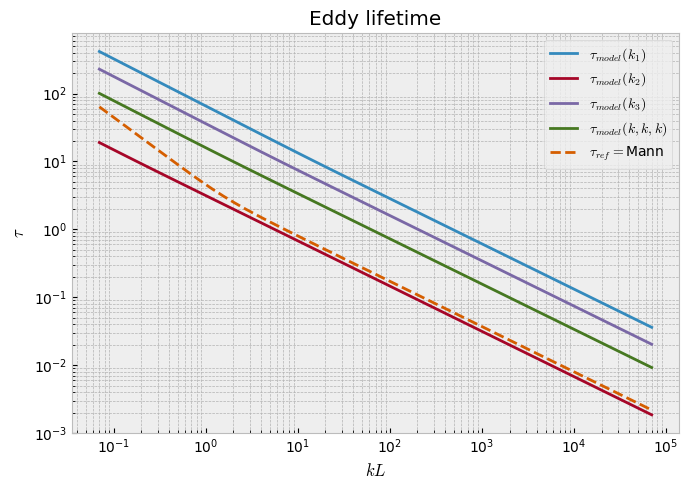

In [17]:
# 100 epochs
# Bumped learning rate to 0.3, bumped alpha_pen1 to 1.0 from 0.0
# Alpha pen2 is 2.0
pb.plot()

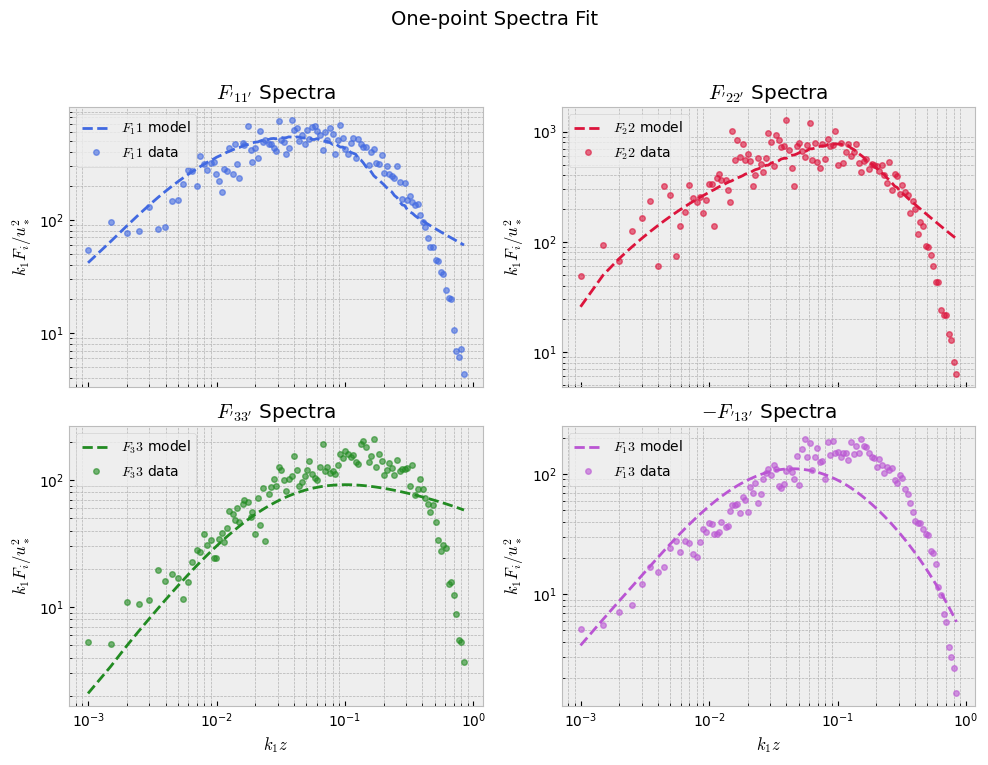

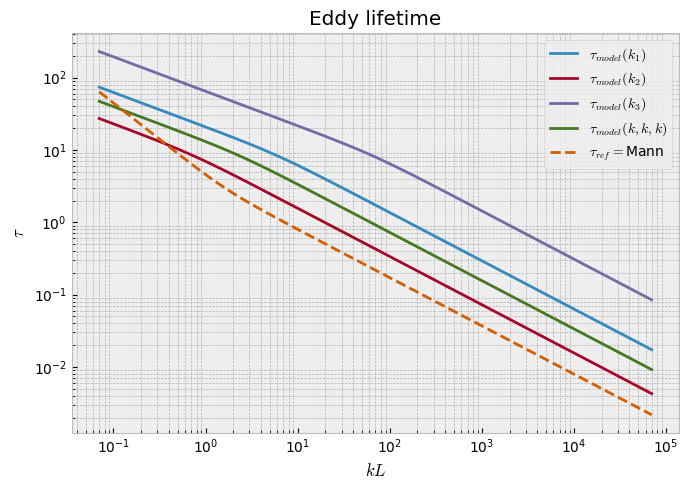

In [9]:
# 100 epochs
# Bumped alpha_pen2 to 2.0
pb.plot()

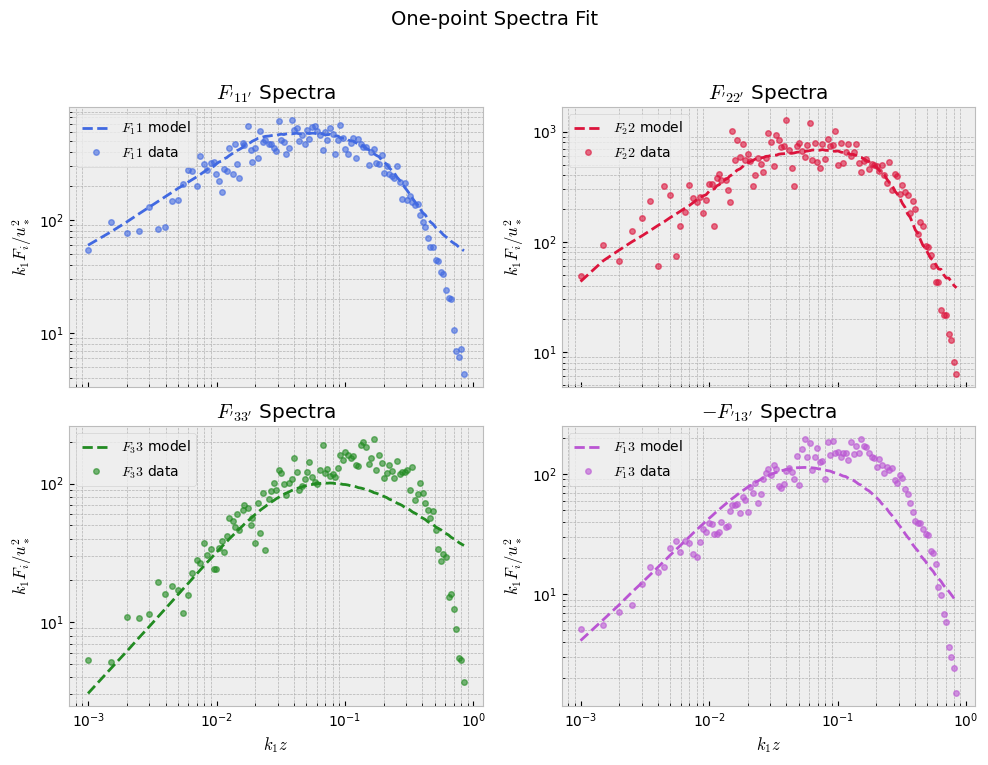

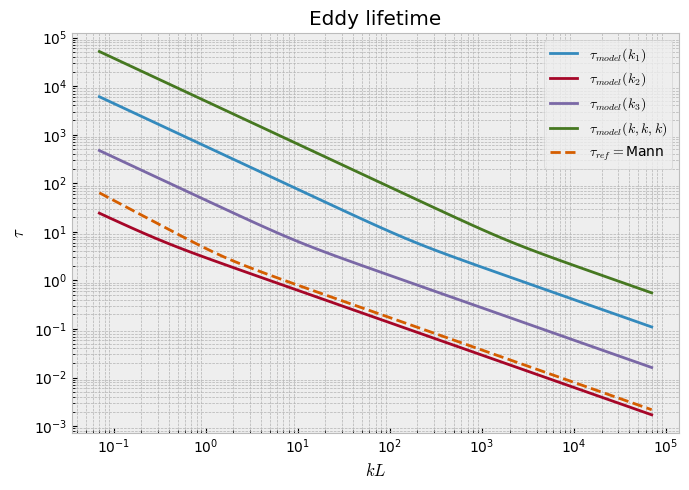

In [5]:
# 100 epochs.
pb.plot()

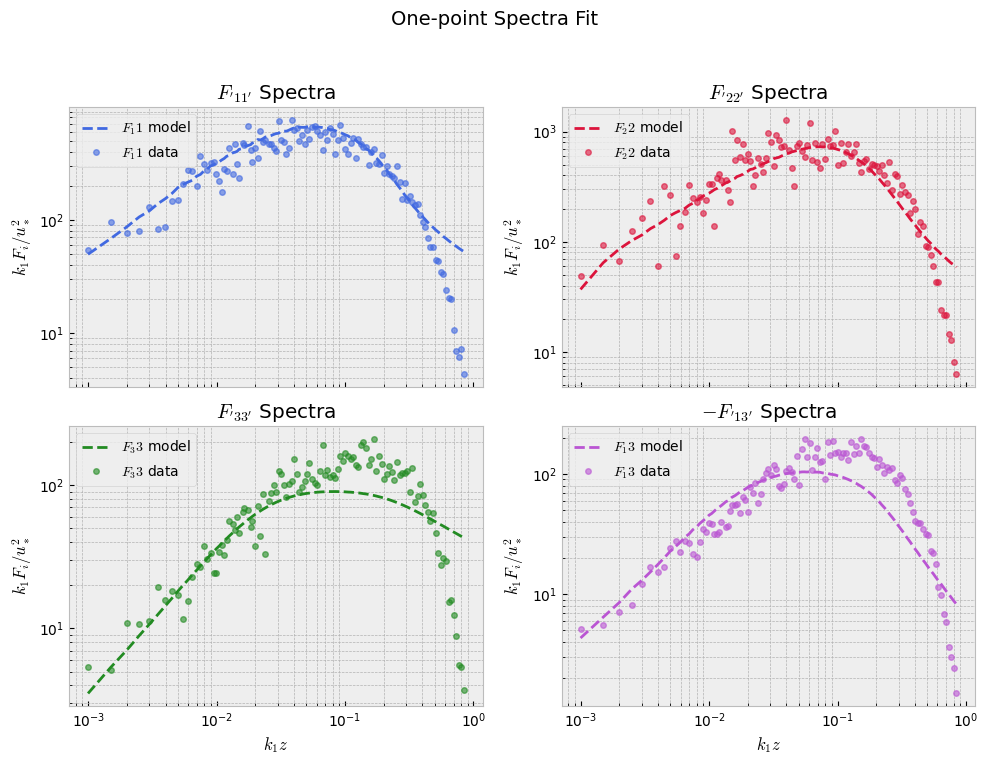

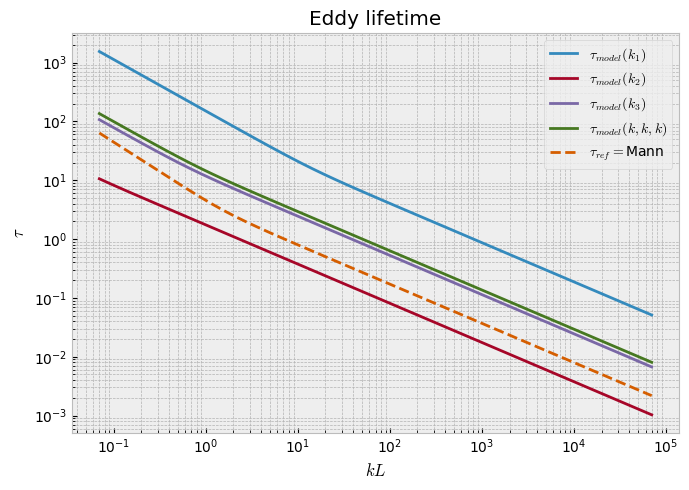

In [43]:
# 40 epochs
pb.plot()

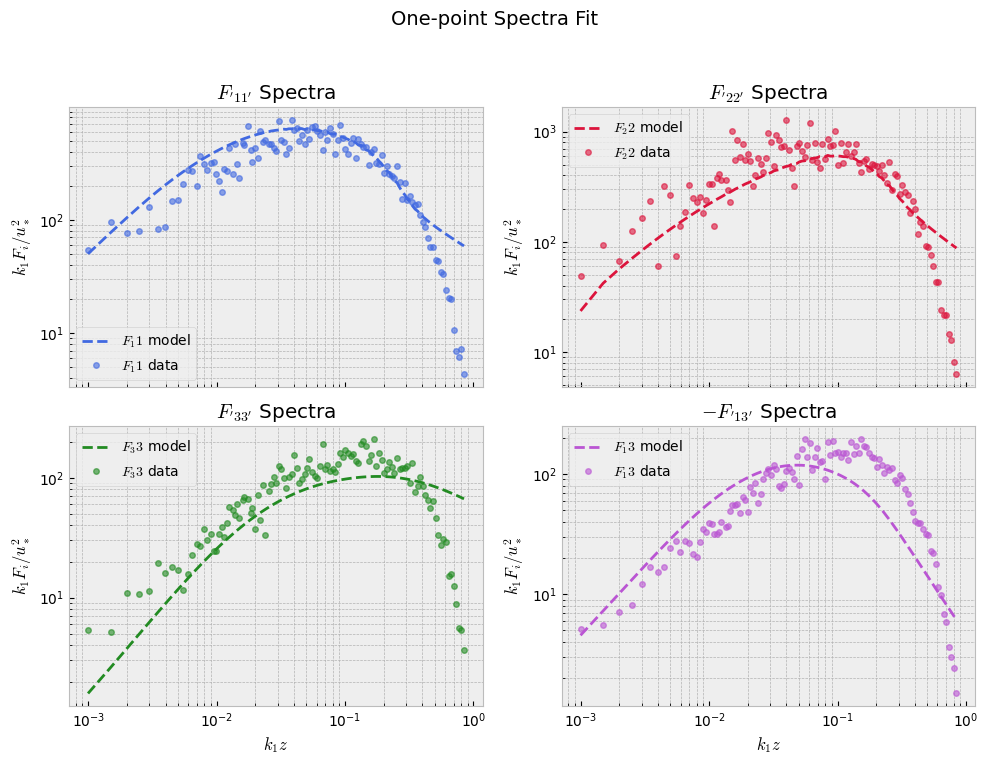

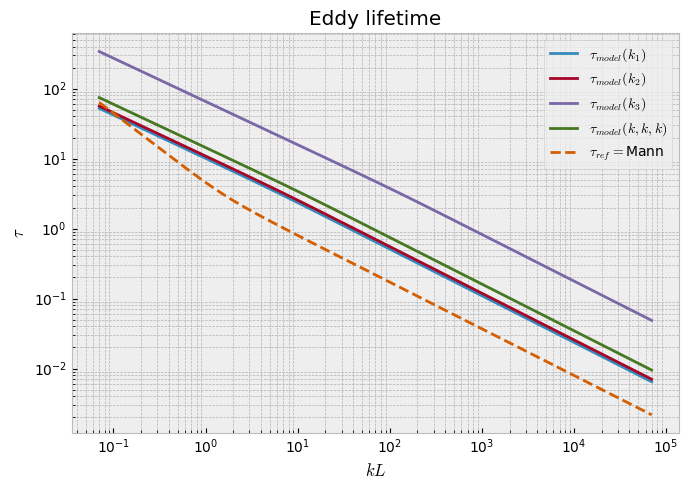

In [39]:
pb.plot()

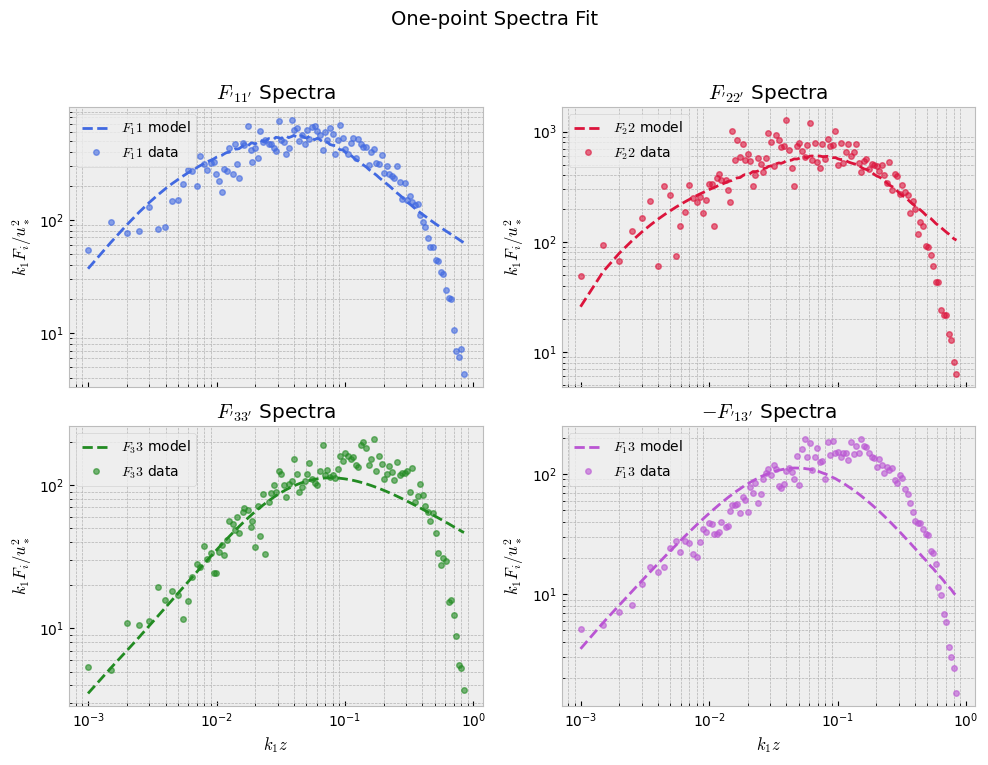

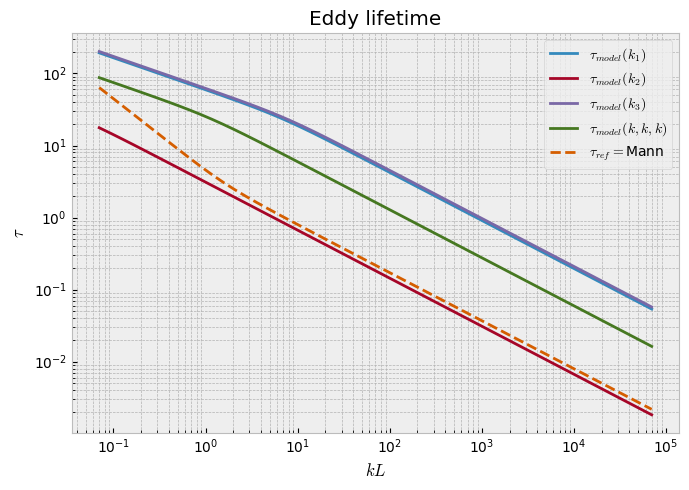

In [25]:
pb.plot()

In [28]:
pb.plot_losses()

TypeError: plot_losses() missing 1 required positional argument: 'run_number'